In [1]:
#Stock Price Prediction using fbprophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("EW-MAX.csv")
data

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600
...,...,...,...,...,...,...,...
4387,2017/9/1,113.790001,114.099998,112.790001,113.309998,113.309998,950000
4388,2017/9/5,112.519997,113.529999,111.160004,111.870003,111.870003,1805200
4389,2017/9/6,112.029999,112.489998,110.250000,112.230003,112.230003,2136700
4390,2017/9/7,112.459999,112.900002,112.000000,112.339996,112.339996,1251600


In [2]:
data.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4.392000e+03
mean,30.562539,30.893618,30.238833,30.572580,30.572580,1.884027e+06
std,29.914758,30.210974,29.615761,29.905778,29.905778,1.621609e+06
min,3.296875,3.390625,3.000000,3.250000,3.250000,1.904000e+05
25%,8.718125,8.803125,8.625000,8.712500,8.712500,1.088800e+06
50%,14.766250,14.981250,14.662500,14.767500,14.767500,1.539300e+06
75%,42.546248,43.051249,42.086249,42.539999,42.539999,2.188900e+06
max,121.080002,121.750000,120.169998,121.360001,121.360001,4.641260e+07


In [3]:
data_c=pd.DataFrame(data[['Date','Close']])
data_c
index_data=data_c.rename(columns={"Date":"ds","Close":"y"})
index_data.head()


,ds,y
0,2000/3/27,4.125000
1,2000/3/28,4.015625
2,2000/3/29,4.000000
3,2000/3/30,3.843750
4,2000/3/31,3.390625


In [4]:
#Splitting into training and testing sets
train_data,test_data=index_data[3:int(len(index_data)*0.9)],index_data[int(len(index_data)*0.9):]


from fbprophet import Prophet
m=Prophet(daily_seasonality=True)
#Fitting the model
m.fit(train_data)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 4 threads.


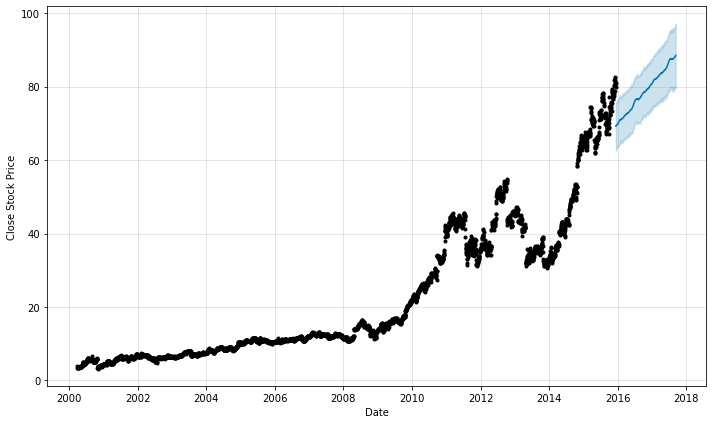

In [5]:
#Prediction on test dataset
prediction=m.predict(test_data)
m.plot(prediction)
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

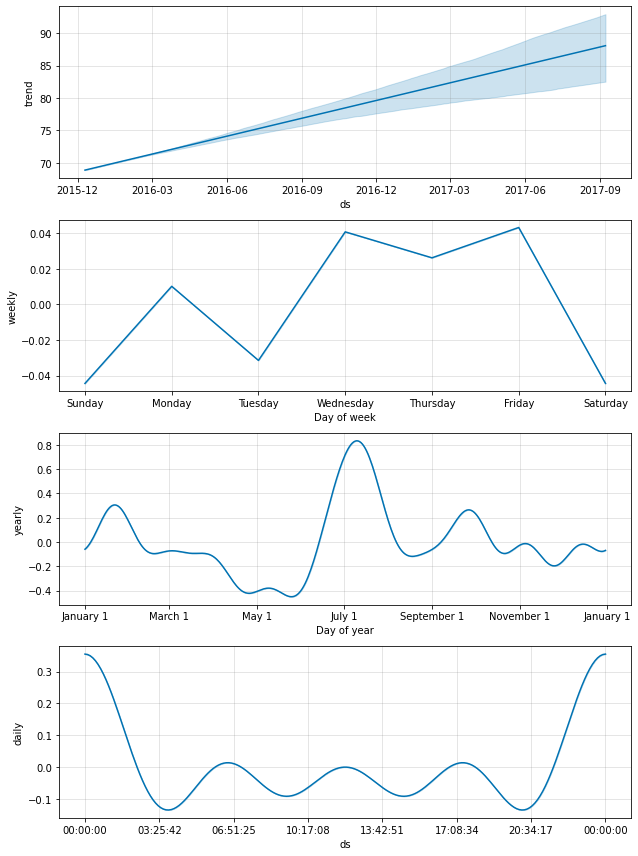

In [6]:
m.plot_components(prediction)
plt.show()